# Исследование объявлений о продаже квартир

Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [2]:
import pandas as pd
data=pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

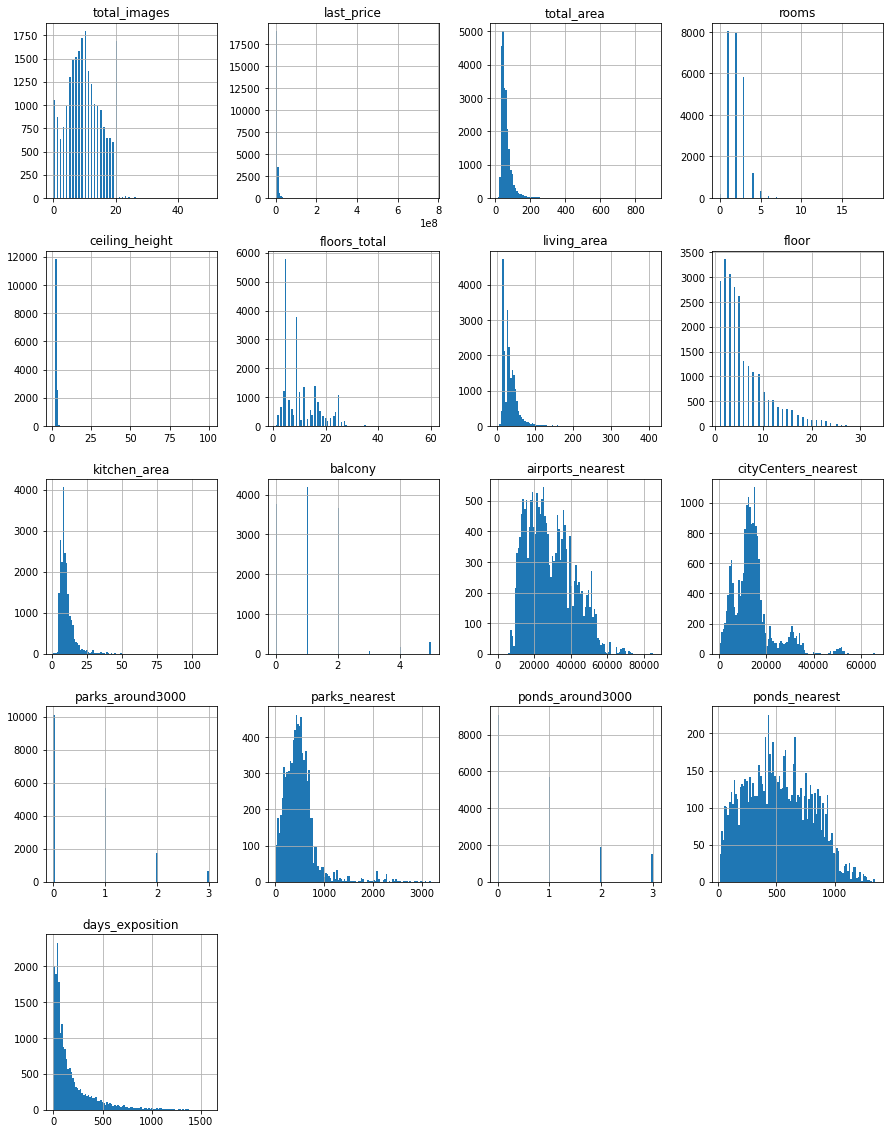

In [5]:
data.hist(figsize=(15, 20),bins=100)

In [4]:
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
data.duplicated().sum()

0

<h2>Вывод</h2>

Проанализировав данные можно сделать соответсвующие выводы:
    
<ul>
    <li>Довольно много пропусков, с каждым и которых необходимо разбираться отдельно</li>
    <li>first_day_exposition - object - должен быть тип datetime</li>
    <li>ceiling_height - нулевые значения</li>
    <li>floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения</li>
    <li>is_apartment - должен быть тип bool + нулевые значения</li>
    <li>living_area - нулевые значения</li>
    <li>kitchen_area - нулевые значения</li>
    <li>balcony - нулевые значения</li>
    <li>locality_name - нулевые значения</li>
    <li>airports_nearest - нулевые значения</li>
    <li>cityCenters_nearest - нулевые значения</li>
    <li>parks_around3000 - тип должен быть int + нулевые значения</li>
    <li>parks_nearest - нулевые значения</li>
    <li>ponds_around3000 - тип должен быть int + нулевые значения</li>
    <li>ponds_nearest - нулевые значения</li>
    <li>daysxposition - тип должен быть int + нул
    <li>проверка показала, что дубликатов нет</li></ul>

### Предобработка данных

In [6]:
# функция классифицирующая квартиры по площади
def categorize_total_area(income):
    if income < 30:
        return 'E'
    elif 31 <= income < 70:
        return 'D'
    elif 71 <= income <110:
        return 'C'
    elif 110 <= income <200:
        return 'B'
    else:
        return 'A'


Добавим столбец классификации квартир по площади

In [7]:
data['total_area_category'] = data['total_area'].apply(categorize_total_area)

Заполним пропуск количество балконов и аппартаментов на 0, а также изменим вещественный тип данных

In [8]:
data['balcony'].fillna(0, inplace=True)
data['balcony'] = data['balcony'].astype(int).abs()
data['is_apartment'].fillna(0, inplace=True)

Проверим с какими параметрами коррелирует площадь квартиры

In [9]:
print(data['total_area'].corr(data['kitchen_area']))
print(data['total_area'].corr(data['living_area']))
print(data['living_area'].corr(data['rooms']))

0.6091211711198321
0.9395373338721495
0.8459774567888595


Очевидно, площадь квартиры хорошо коррелирует с площадью кухни, жилой площадью и количеством комнат. 
Данный факт можно применить для заполнения соответствующих пропусков

Поскольку обнаружена линейная связь площади квартиры с некоторыми параметрами, заменим пропуски медианными значениями, с учетом категорий квартир

In [10]:
median_kitchen_area = data.groupby('total_area_category')['kitchen_area'].transform('median') 
data['kitchen_area'].fillna(median_kitchen_area, inplace=True)

median_living_area = data.groupby('total_area_category')['living_area'].transform('median') 
data['living_area'].fillna(median_living_area, inplace=True)

высоту потолков заменим на медианное значение

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].round(1)

Если в объявлении не указано расположение прудов и парков в ближайшем радиусе, значит их там нет

In [12]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0).astype(int)
data['parks_around3000']=data['parks_around3000'].fillna(0).astype(int)

Удалим неявные дубли

In [13]:
data['locality_name']=data['locality_name'].str.replace('поселок', 'посёлок')

Заполним неизвестные локации названием "no name", поскольку это может быть недвижимость между населенными пунктами 

In [14]:
data['locality_name'].fillna("no name", inplace=True)

Предполагаю, что квартиры с незаполненным этажем находятся на последнем этаже дома 

In [15]:
data['floors_total']=data['floors_total'].fillna(data['floor']).astype(int) 

Аномально низкие потолки до 2х метров меняю на значение медианы

In [16]:
data.loc[(data['ceiling_height']>9), 'ceiling_height'] = data['ceiling_height']/10
data.loc[(data['ceiling_height']<2), 'ceiling_height'] = data['ceiling_height'].median() 
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median()) #заполняю пропуски

Пропущенные days_exposition означают, что на момент выгрузки таблицы объявление ещё висит.
Поэтому логично заменить пропущенные значения на разницу между датой выгрузки таблицы и датой первой публиикации

In [17]:
#data['days_exposition']=data['days_exposition'].fillna((max(data['first_day_exposition'])-data['first_day_exposition']).astype(int))
data['days_exposition']=data['days_exposition'].fillna(0).astype(int)

Пропуски в столбцах ponds_nearest, parks_nearest, airports_nearest,cityCenters_nearest не заполняю, т.к. это скорее всего обусловленно отсутствием данных критерей

Меняю тип столбца first_day_exposition с object to datetime6

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Посчитаем и добавим в таблицу новые столбцы

Добавим новые столбцы

In [19]:
def type_floor(index):
    if index['floor'] == 1:
        return 'первый'
    if index['floor'] == index['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['price_one_meter']=data['last_price']/data['total_area']
data['cityCenters_nearest_km']=round(data['cityCenters_nearest']/1000) # перевожу метры в километры, формат оставляю десятичной дроби, из-за пропусков

data['type_floor']=data.apply(type_floor, axis=1)

data['day_exposition']=pd.to_datetime(data['first_day_exposition'], yearfirst=True).dt.weekday
data['month_exposition']=pd.to_datetime(data['first_day_exposition'], yearfirst=True).dt.month 
data['year_exposition']=pd.to_datetime(data['first_day_exposition'], yearfirst=True).dt.year 

#print(data['cityCenters_nearest'].median())

data=data.round({'price_one_meter': 2})

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_one_meter,cityCenters_nearest_km,type_floor,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,0,...,2,755.0,0,C,120370.37,16.0,другой,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,0,...,0,NaN,81,D,82920.79,19.0,первый,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,0,...,2,574.0,558,D,92785.71,14.0,другой,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,78.0,9,0,...,3,234.0,424,B,408176.10,7.0,другой,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,0,...,1,48.0,121,C,100000.00,8.0,другой,1,6,2018


### Проведем исследовательский анализ данных

In [20]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='count')

,last_price
type_floor,
другой,17363
первый,2917
последний,3419


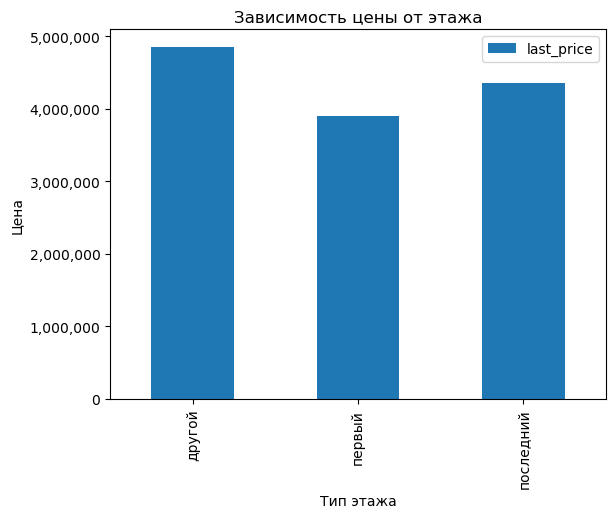

In [21]:
import matplotlib
ax = (data.pivot_table(index='type_floor', values='last_price', aggfunc='median').plot(kind='bar', style='o-', title='Зависимость цены от этажа')
)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set(xlabel='Тип этажа', ylabel='Цена');

Выведем и проанализируем статистики с помощью describe

In [22]:
col=list(data.columns)
data[col].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,cityCenters_nearest_km,day_exposition,month_exposition,year_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,8079.000000,23699.000000,9110.000000,23699.000000,2.369900e+04,18180.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.681257,10.671463,34.431421,5.892358,10.416538,0.591080,...,0.469049,490.804555,0.590911,517.980900,156.608844,9.942166e+04,14.184818,2.569307,6.400101,2017.367146
std,5.682529,1.088701e+07,35.654083,1.078405,0.242524,6.595802,21.503034,4.885249,5.682999,0.959298,...,0.748534,342.317995,0.883999,277.720643,213.546873,5.030680e+04,8.616194,1.789082,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,0.000000,1.118300e+02,0.000000,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.100000,0.000000,...,0.000000,288.000000,0.000000,294.000000,22.000000,7.658547e+04,9.000000,1.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,0.000000,502.000000,74.000000,9.500000e+04,13.000000,3.000000,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,729.000000,199.000000,1.142563e+05,16.000000,4.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,66.000000,6.000000,12.000000,2019.000000


In [23]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,cityCenters_nearest_km,day_exposition,month_exposition,year_exposition
total_images,1.000000,0.104473,0.115352,0.099288,0.057337,0.011147,0.101956,0.031340,-0.029303,-0.024407,...,0.037085,-0.008347,0.011323,-0.003034,-0.055593,0.132780,-0.047120,-0.010433,0.005043,0.140411
last_price,0.104473,1.000000,0.653675,0.363343,0.270652,-0.006993,0.553164,0.026576,-0.025362,-0.008802,...,0.197840,-0.016414,0.208621,-0.084809,0.053577,0.736499,-0.206995,0.001550,0.002779,-0.043089
total_area,0.115352,0.653675,1.000000,0.758344,0.362293,-0.075652,0.898354,-0.024754,-0.072653,-0.034885,...,0.200211,-0.021497,0.200294,-0.097969,0.097039,0.301960,-0.231255,-0.004695,0.004920,-0.079912
rooms,0.099288,0.363343,0.758344,1.000000,0.228967,-0.227227,0.828425,-0.150862,-0.147286,-0.087500,...,0.157495,-0.054549,0.121276,-0.057689,0.079293,0.055420,-0.184374,-0.004134,-0.004469,-0.055418
ceiling_height,0.057337,0.270652,0.362293,0.228967,1.000000,-0.086182,0.344877,-0.049088,0.008349,-0.006043,...,0.230760,-0.058358,0.201702,-0.104605,0.071433,0.283002,-0.269218,-0.025392,-0.004381,-0.033444
floors_total,0.011147,-0.006993,-0.075652,-0.227227,-0.086182,1.000000,-0.160772,0.678109,0.069522,0.050728,...,-0.158878,0.096972,-0.049178,0.039055,-0.026606,0.147838,0.018570,0.013187,0.015753,0.008409
living_area,0.101956,0.553164,0.898354,0.828425,0.344877,-0.160772,1.000000,-0.091190,-0.056849,-0.032321,...,0.210531,-0.047226,0.184363,-0.081157,0.092839,0.225293,-0.228268,-0.006519,0.001487,-0.074413
floor,0.031340,0.026576,-0.024754,-0.150862,-0.049088,0.678109,-0.091190,1.000000,0.036940,0.035824,...,-0.105212,0.073045,-0.029710,0.024850,-0.021349,0.129068,0.008574,0.012347,0.019387,0.004915
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.008349,0.069522,-0.056849,0.036940,1.000000,-0.004235,...,-0.032014,0.009134,-0.009690,0.002606,-0.017766,0.015636,-0.007468,-0.000843,0.000976,0.011961
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,-0.006043,0.050728,-0.032321,0.035824,-0.004235,1.000000,...,-0.016378,0.010612,-0.004127,-0.003328,-0.017025,0.008266,-0.003802,0.011042,0.025765,-0.021095


Предварительный анализ показал, что существуют квартиры от 8 до 50 кв.м. Среднее значение выглядит около 45 м2. Самый большой коэфициент влияющий на стоимость квартиры: Общая площадь. В меньшей мере на стоимость влияют (по отдельности): жилая площадь, площадь кухни, кол-во комнат. Дата размещения объявления и тип квартиры (этажность) на конечную стоимость влияния не оказывают;

Составим список наиболее значимых параметров

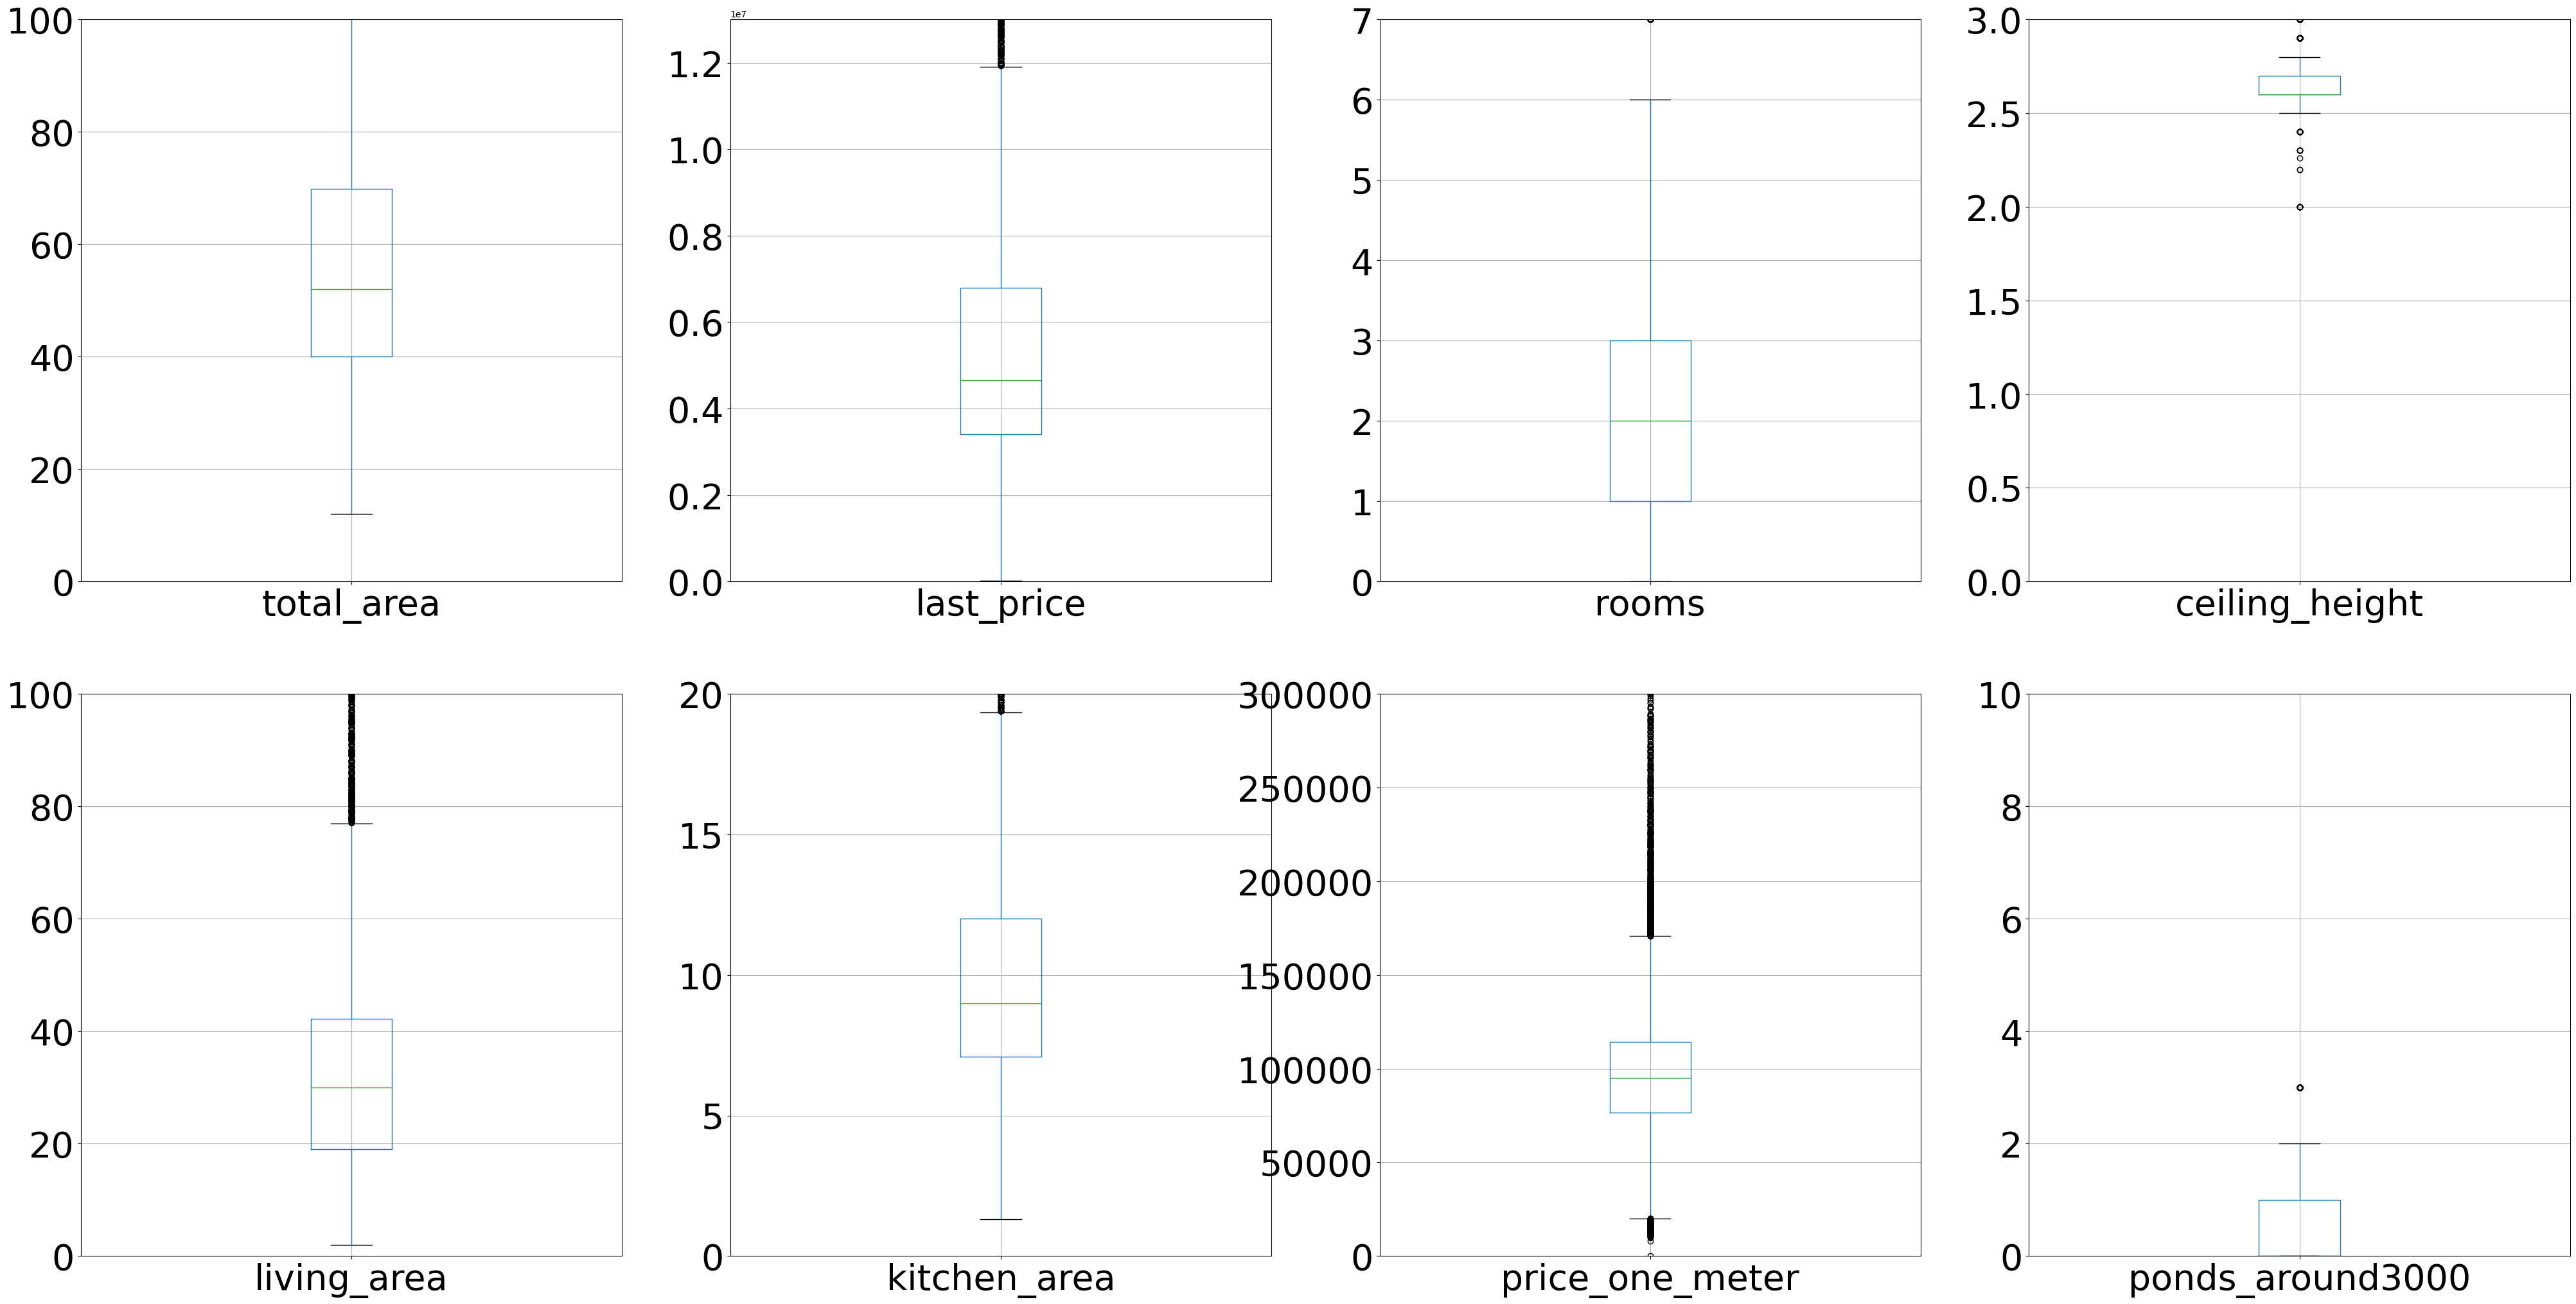

In [24]:
significant_parameters=['total_area', 'last_price', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area', 'price_one_meter', 'ponds_around3000']
 

#определим выбросы по каждому из набора данных
import matplotlib.pyplot as plt
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = significant_parameters
ylims = [100, 13000000, 7, 3, 100, 20, 300000,10,10]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Определяем границы:

total_area - 9-90 кв.м.;

last_price - 0-12 млн.;

rooms - 0-6 комнат;

ceiling_height - от 2.5 до 3 м; - от 0 до 80 м2;

living_area - от 0 до 80 м2; - от 0 до 20 м2;

kitchen_area - от 0 до 20 м2;

price_one_meter - от 10000 до 250000 руб;

ceiling_height - 2,4-3,25м.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

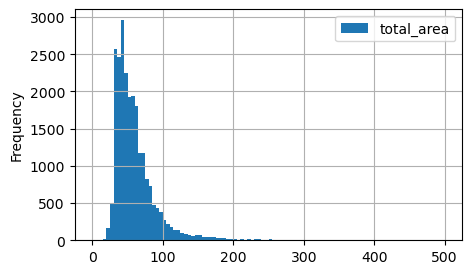

In [25]:
#Изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
#распределение данных в целом нормальное, есть некторые выбросы, но они в целом не портят общую картину

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

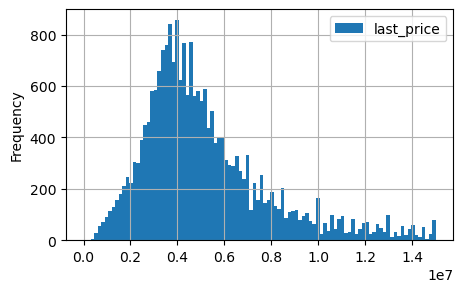

In [26]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

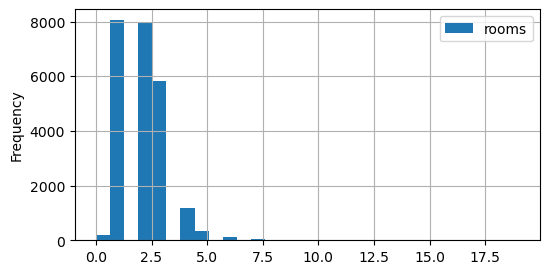

In [27]:
#Изучим число комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (6,3))
data['rooms'].describe()
#с данными все впорядке

count    23699.000000
mean         2.681257
std          0.242524
min          2.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

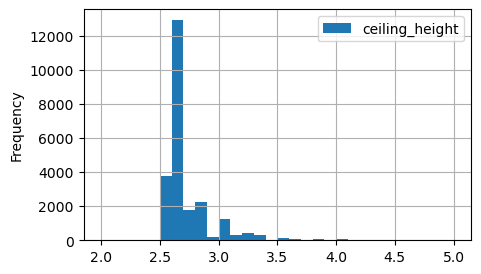

In [28]:
#Изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()
#с данными все впорядке

In [29]:
print(data['total_area'].median())
print(data['last_price'].median())
print(data['rooms'].median())
print(data['ceiling_height'].median())

52.0
4650000.0
2.0
2.6


Предварительный вывод

Общая площадь в нашей выборке колеблется от 8 до 900 м2, среднее значение 45, а медиана 38,2 м2. 

Распределение данных Гаусса.

Цены на недвижимость имеют среднее значение в районе 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.
Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

Высота потолков в среднем составляет 2,68 м, медиана 2,6 м.

Во всех данных есть неадекватные значения, наподобе 0 комнат, высоты потолков в 1 или 100 метров, а также цена квартиры в 12190 рублей. 

Необходимо уточнить у сотрудников, предоставляющих эти данные

<h3>Изучим кратко данные, не имеющие явную ленийную связь</h3>

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

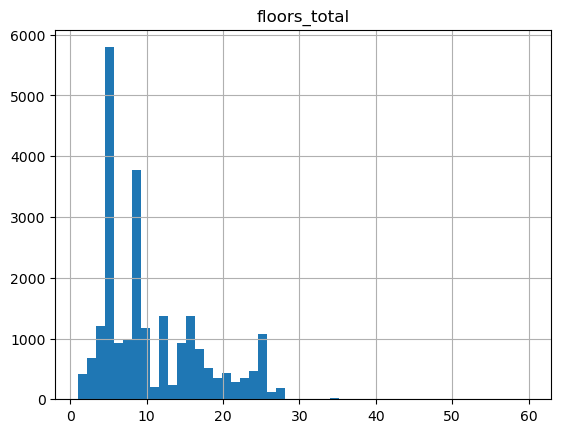

In [30]:
data.hist('floors_total', bins=50)
data['floors_total'].describe()

Видны два пика, 4 и 7 этажные здания встречаются чаще всего

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

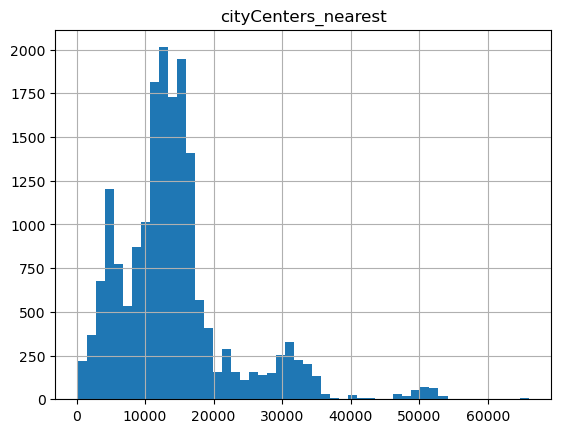

In [31]:
data.hist('cityCenters_nearest', bins=50)
data['cityCenters_nearest'].describe()

Нормальное распреледение, медианное значние отдаления 14км

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

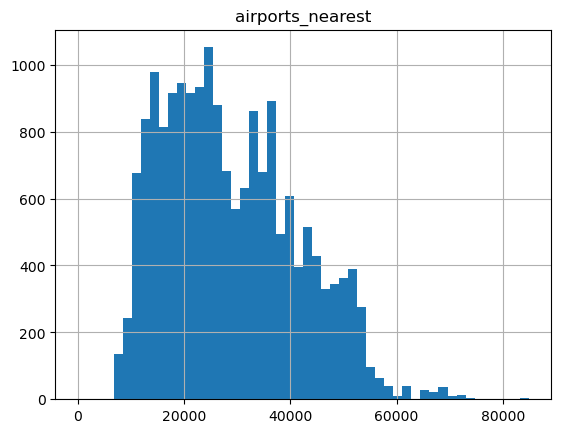

In [32]:
data.hist('airports_nearest', bins=50) 
data['airports_nearest'].describe()

От 15 до 50 км до аэропорта, хорошая выборка данных

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

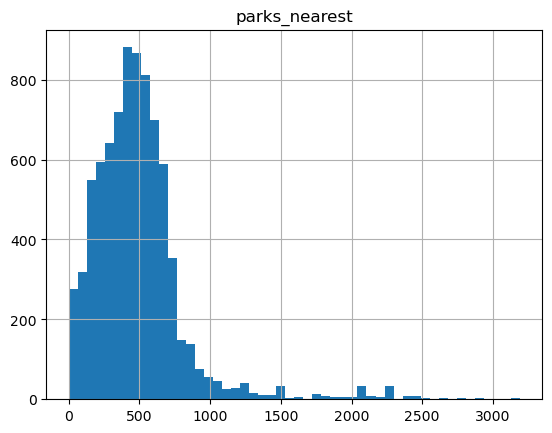

In [33]:
data.hist('parks_nearest', bins=50)
data['parks_nearest'].describe()

Нормальное распределение данных, больше всего помещений в отдалении от парка на 500м.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

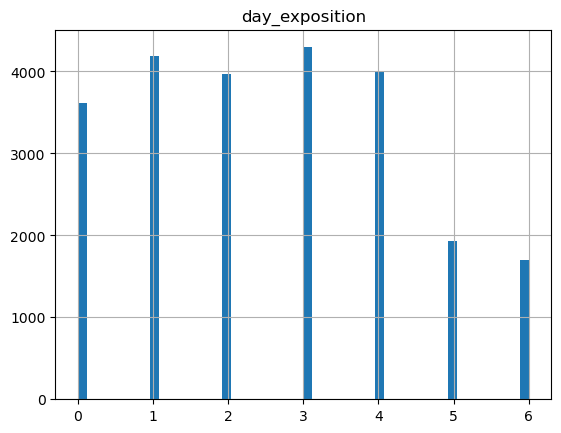

In [34]:
data.hist('day_exposition', bins=50)
data['parks_nearest'].describe()

В сб и вск выставляют объявления меньше всего

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

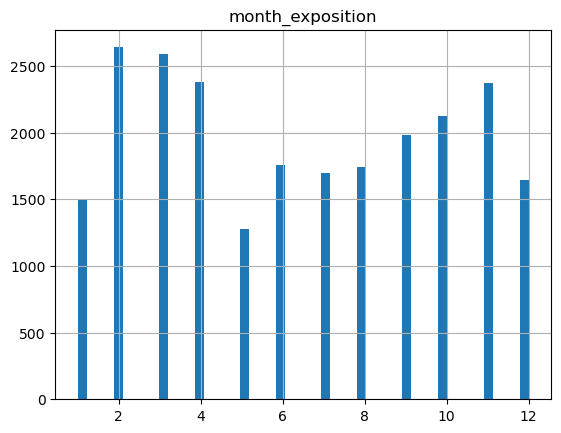

In [35]:
data.hist('month_exposition', bins=50)
data['month_exposition'].describe()

 Явно наблюдается сезонность

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

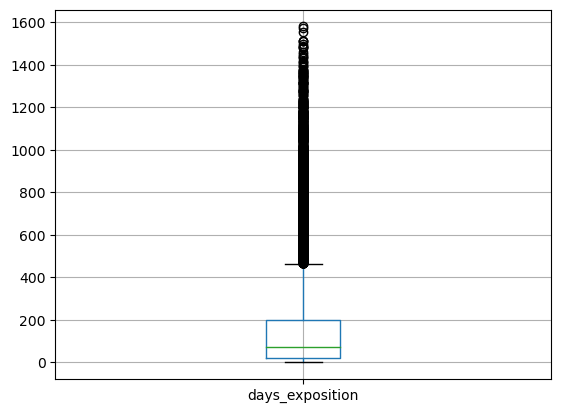

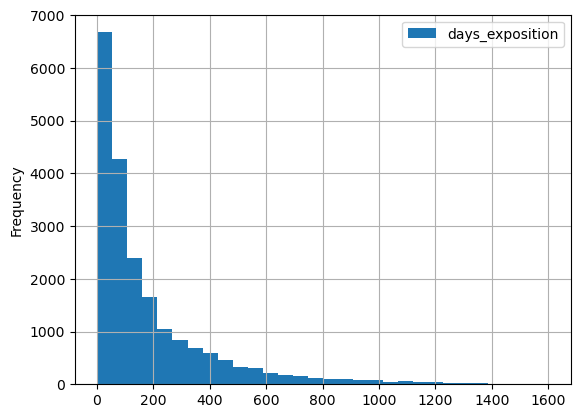

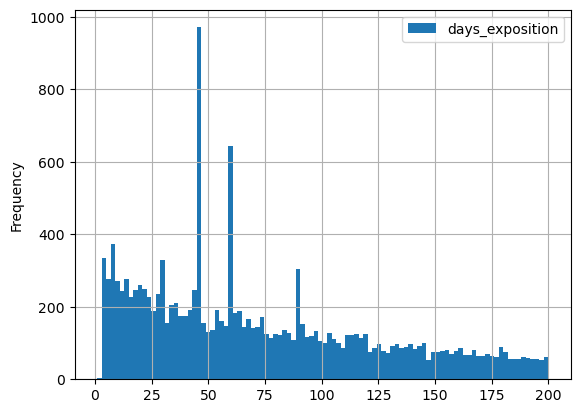

In [36]:
#диаграмма размаха
data.boxplot(column='days_exposition')

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

Вывод

Распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Наблюдаются аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.

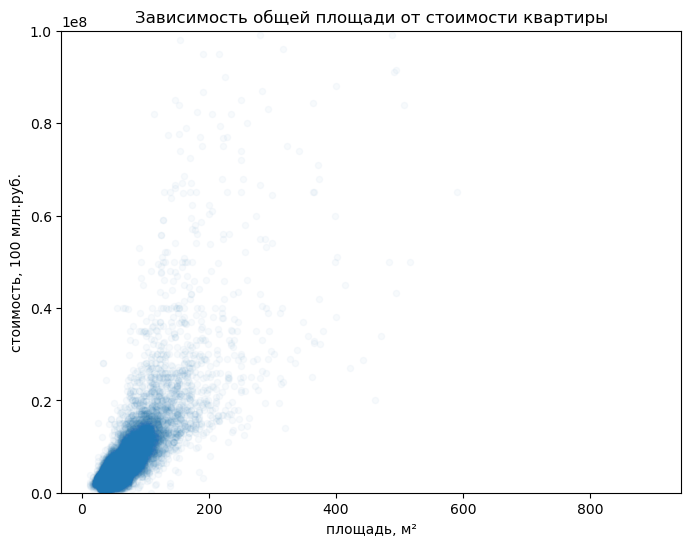

In [37]:
# Зависимость цены от общей площади
data.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Зависимость довольно значимая, хоть и разброс достаточно велик.

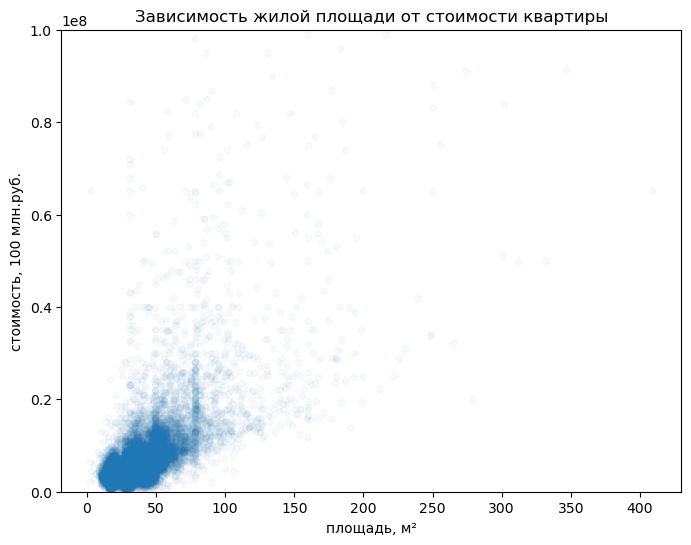

In [38]:
# Зависимость цены от жилой площади
data.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и жило площадью до 75 м². Зависимость прямопропорциональная - чем больше жилаяплощадь квартиры, тем выше ее стоимость.*

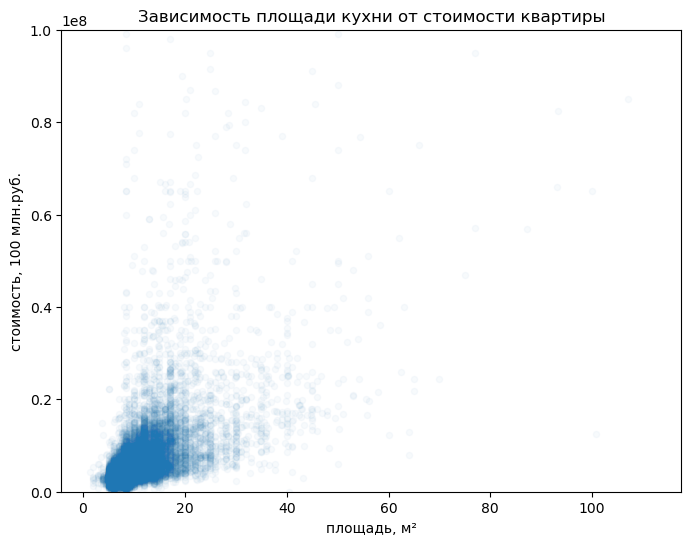

In [39]:
# Зависимость цены от площади кухни

data.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

*Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.*

In [40]:
# Выведем названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'total_area_category',
       'price_one_meter', 'cityCenters_nearest_km', 'type_floor',
       'day_exposition', 'month_exposition', 'year_exposition'],
      dtype='object')

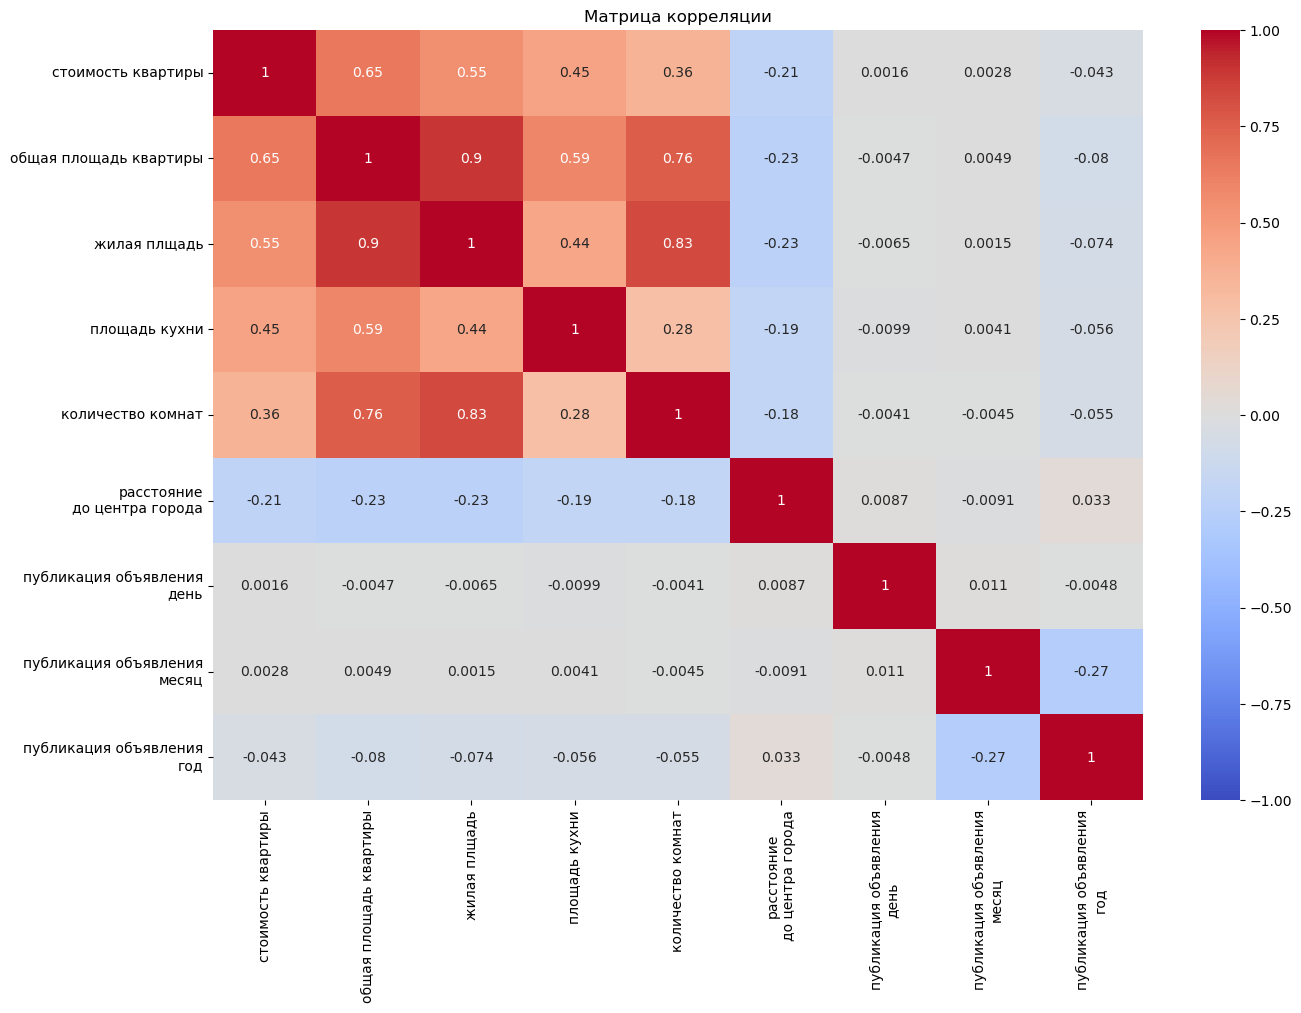

In [41]:
import seaborn as sns
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'cityCenters_nearest_km',
    'day_exposition',
    'month_exposition',
    'year_exposition']
# Список с названиями параметров
corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'жилая плщадь',
    'площадь кухни',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод']

# Получаем матрицу корреляции
corr_matrix = data[corr_param].corr()

# Визуализируем матрицу корреляции
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

### Вывод

- Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. 
- Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадью. Соответственно чем количество комнат больше, тем больше стоимость квартиры. 
- Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. 
- Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления также отсутствует линейная связь.*

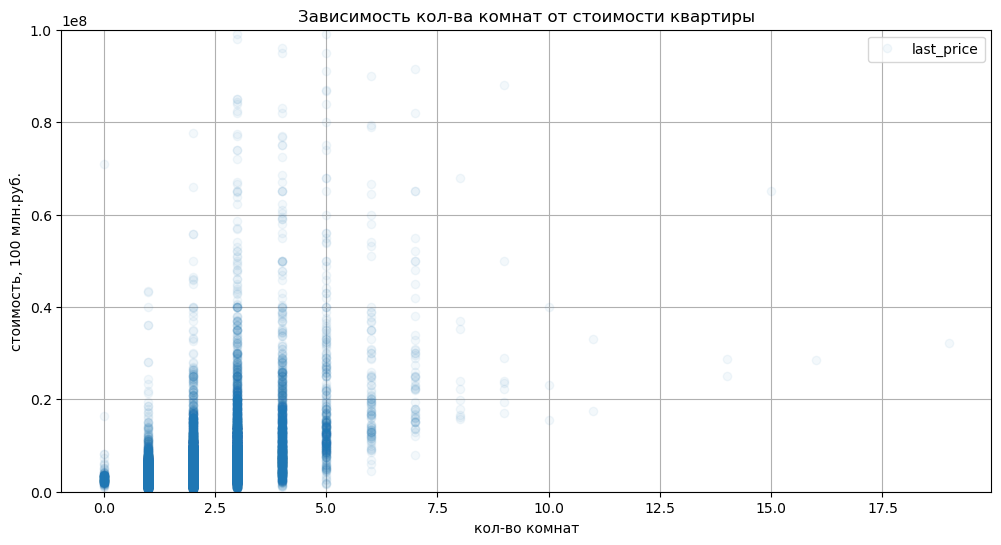

In [42]:
data.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.05)
plt.title('Зависимость кол-ва комнат от стоимости квартиры')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

*Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб и кол-вом комнат от 1 до 3. Для этого диапазона: с учеличение числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Это можно объяснить тем, что в старом фонде есть 5-ти комнатные квартиры с маленькой площадью комнат.*

In [44]:
pivot_table_day = data.pivot_table(index = 'day_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day

,mean,count,median
,last_price,last_price,last_price
day_exposition,,,
0,6.511613e+06,3612,4650000.0
1,6.394233e+06,4183,4730000.0
2,6.627970e+06,3974,4700000.0
3,6.708663e+06,4295,4650000.0
4,6.372131e+06,4000,4585000.0
5,6.976804e+06,1936,4555000.0
6,6.246180e+06,1699,4550000.0


In [45]:
pivot_table_month = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month

,mean,count,median
,last_price,last_price,last_price
month_exposition,,,
1,6.668233e+06,1500,4600000.0
2,6.468500e+06,2640,4650000.0
3,6.359275e+06,2587,4650000.0
4,6.737198e+06,2379,4800000.0
5,6.600435e+06,1274,4515000.0
6,6.310269e+06,1760,4400000.0
7,6.649337e+06,1695,4650000.0
8,6.350233e+06,1744,4570000.0


In [46]:
pivot_table_year = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year

,mean,count,median
,last_price,last_price,last_price
year_exposition,,,
2014,1.208714e+07,137,7700000.0
2015,8.572833e+06,1191,5350000.0
2016,6.827912e+06,2783,4550000.0
2017,6.585729e+06,8190,4500000.0
2018,5.950966e+06,8519,4550000.0
2019,6.782388e+06,2879,5050000.0


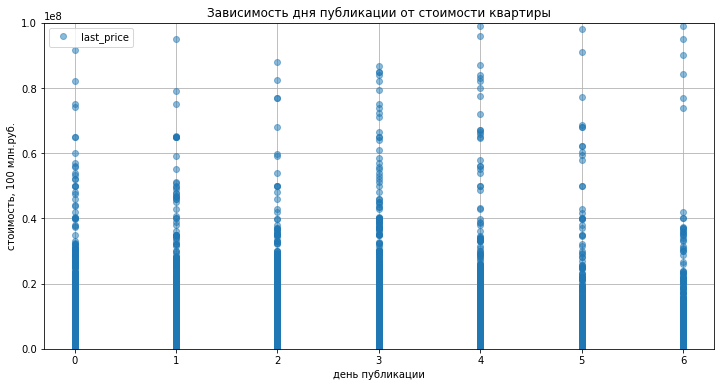

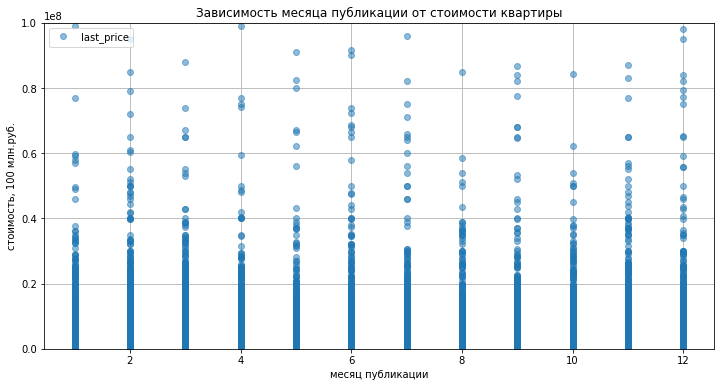

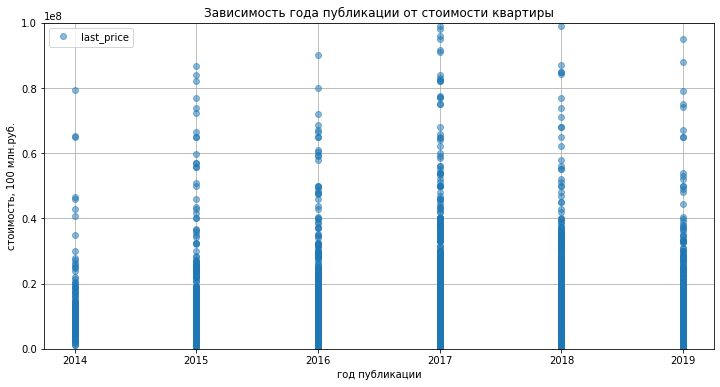

In [57]:
# график дня недели от стоимости
data.plot(x = 'day_exposition', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

# график месяца от стоимости
data.plot(x = 'month_exposition', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

#график года от стоимости
data.plot(x = 'year_exposition', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. Также из ранее построенной матрицы корреляции видно, что Коэффициенты корреляции отрицательные и близки к нулю.

In [47]:
#ТОП 10 населенных пунктов с наибольшим числом объявлений
top_10_localities = data['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      15721
посёлок Мурино         556
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [48]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10_localities_pivot = data.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_meter')
top_10_localities_pivot.sort_values(by='price_one_meter', ascending=False)

,price_one_meter
locality_name,
Санкт-Петербург,114849.008793
Пушкин,103125.819377
деревня Кудрово,92473.547559
посёлок Парголово,90175.913089
посёлок Мурино,85681.762572
посёлок Шушары,78677.364318
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


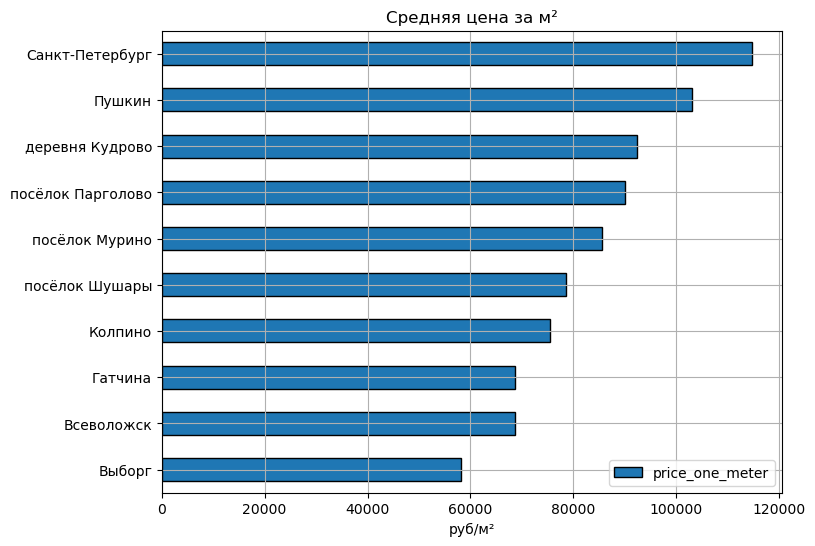

In [49]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

top_10_localities_pivot.sort_values(by='price_one_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

#### Вывод: Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге, что логично. Следом по стоимости идет Пушкин, что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге.*

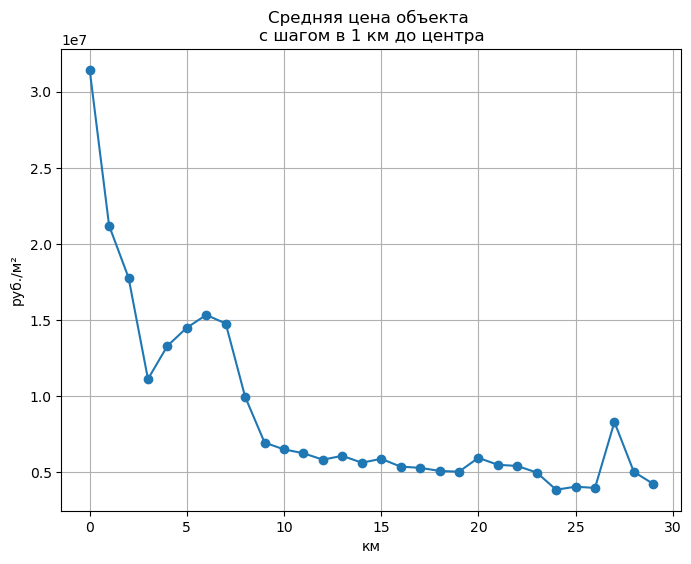

In [50]:
# Построим график изменения цены объекта от расстояния до центра

# выберем только Санкт-Петербург
df_spb = data.query('locality_name == "Санкт-Петербург"')

# Рассчитаем среднюю цену квадратного метра до центра
(
df_spb
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена объекта \nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()


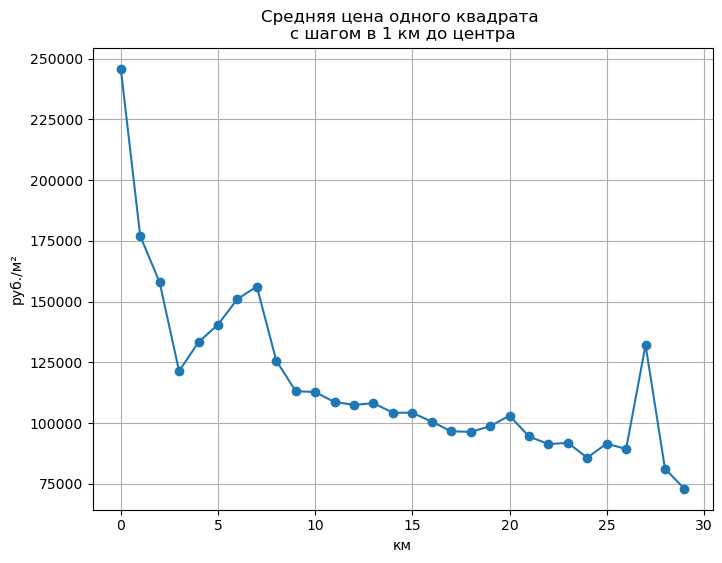

In [51]:
# Рассчитаем среднюю цену квадратного метра до центра

(
df_spb
    .pivot_table(index='cityCenters_nearest_km', values='price_one_meter')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена одного квадрата \nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Изменение средней цены одного квадрата коррелирует с данным о средней стоимости всего объекта. Данные характеристики взаимозаменяемы, но исследование графика изменения квадрата более корректно в контексте задачи.

Вывод: *Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за класса жилья - элитное.*

### Общий вывод

Общий вывод

Обработан архив данных по недвижимости СПБ, в т.ч:
- обработаны пропущенные значения там, где это необходимо;
- заменены типы данных на необходимые для удобной работы;
- посчитаны и добавили в таблицу цену квадратного метра жилья;
- выведены даты, дни,  недели, месяцы и года размещения объявлений;
- Изучены следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков.

Были определены аномалии в данных параметрах. С помощью диаграммы размаха выявлено, что значения продажи квартир варьируются от 1 до 600 дней. 

Выявлено, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру.

Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.  

Наибольшее влияние на стоимость квартиры оказывает её площадь.* Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость.


Также установлено:

*Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге* (топ-10 населенных пунктов по количеству объявлений).
*Самая низкая средняя стоимость квадратного метра в Выборге* (топ-10 населенных пунктов по количеству объявлений).
